In [1]:
import SimpleITK as sitk
import numpy as np

sitk_t1=sitk.ReadImage('t1.nii.gz')
t1=sitk.GetArrayFromImage(sitk_t1)
print(t1.shape)

(90, 256, 256)


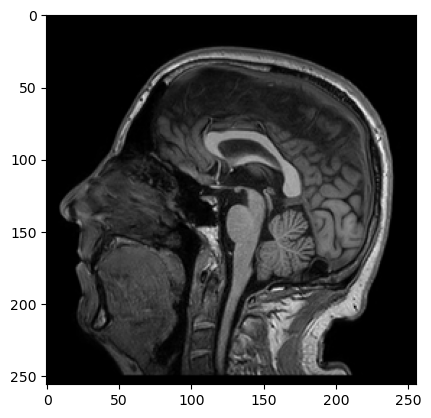

In [2]:
import matplotlib.pyplot as plt
plt.imshow(t1[45],cmap='gray')

In [86]:
import sigpy.mri
import sigpy.plot
coord = sigpy.mri.radial([9,10,2],[256,256],golden=False)
print(coord.shape)

(9, 10, 2)


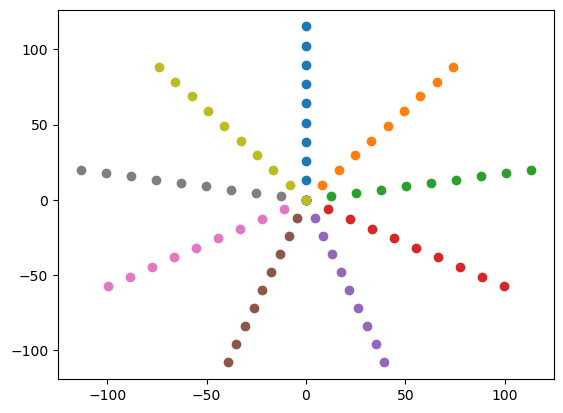

In [87]:
for spoke in coord:
    plt.scatter(spoke[:,0],spoke[:,1])
plt.show()

# Test to discretize a Cartesian plane


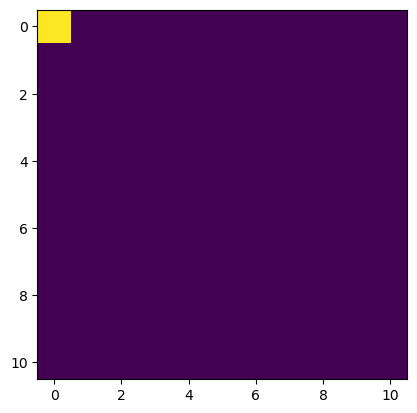

In [155]:
grid = np.zeros([11,11])
grid[0,0] = 1
plt.imshow(grid)

In [156]:
grid_extent = np.array([[-1,1],[-1,1]])
grid_length = np.array([abs(grid_extent[0,1]-grid_extent[0,0]),abs(grid_extent[1,1]-grid_extent[1,0])])
pixel_size = grid_length/grid.shape
print(f'Pixel size: {pixel_size}')
grid_offset = np.array([abs(grid_extent[0,0]),abs(grid_extent[1,0])]) + 0.5*pixel_size
print(f'Grid offset: {grid_offset}')
print(f'grid_offset/px_size = {grid_offset/pixel_size}')

Pixel size: [0.18181818 0.18181818]
Grid offset: [1.09090909 1.09090909]
grid_offset/px_size = [6. 6.]


10 10


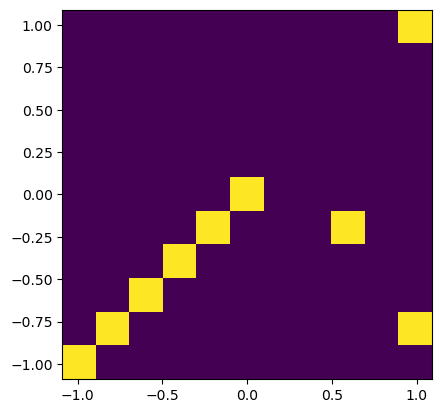

In [167]:
p = np.array([0.75,0.75])
idx = (np.floor((p + grid_offset)/pixel_size)).astype(int)
print(*idx)
grid[idx[0],idx[1]] = 0.5
plt.imshow(np.flipud(grid.T),extent=(-1-pixel_size[0]/2,1+pixel_size[0]/2,-1-pixel_size[1]/2,1+pixel_size[1]/2))

**Need:** A way of locating coordinates (x,y) of a continuous plane in a NxM grid, representing an image. (x,y) has to map to a given pixel in the image `I`, identified by two indices. 

The operation `np.round(point - grid_offset/pixel_size).astype(int)` gives the two indices of the image pixel corresponding to the point (x,y). The offset is always taken to be 0.5 times the size of the pixel, so that the origin lies at the center of the pixel `I[0,0]`.

Since we assume the origin to be at the bottom left corner of the image, but the image has to be transposed and flipped upside-down 

In [ ]:
sigpy.gridding(grid,[2.25,6.1]